<a href="https://colab.research.google.com/github/Anthony-Rispoli/DataMining/blob/main/creditfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/emrahsirin/c-card-fraud-detection-logreg-decisiontree-knn

https://www.kaggle.com/code/mazami/credit-card-fraud-classification

https://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/#:~:text=Python%20Decision%20Tree%20Classifier%20in%20Python%20using%20Scikit-learn,into%20smaller%20subsets%20eventually%20resulting%20in%20a%20prediction.

https://www.ibm.com/topics/knn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn import preprocessing, model_selection, neighbors
data = pd.read_csv('/content/drive/MyDrive/card_transdata.csv') 

In [15]:
data.shape
#check data shape

(1000000, 8)

In [16]:
cleaned_data = data.dropna()
#drop any empty data rows

In [17]:
cleaned_data.shape
#no rows were dropped, the data is complete

(1000000, 8)

In [18]:
cleaned_data.nunique()
#check for duplicate entries

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

Based on this table we can conclude that there are no duplicate entries in the data set. It should be perfectly cleaned and ready to work with at this point.

fraud
0.0    912597
1.0     87403
dtype: int64

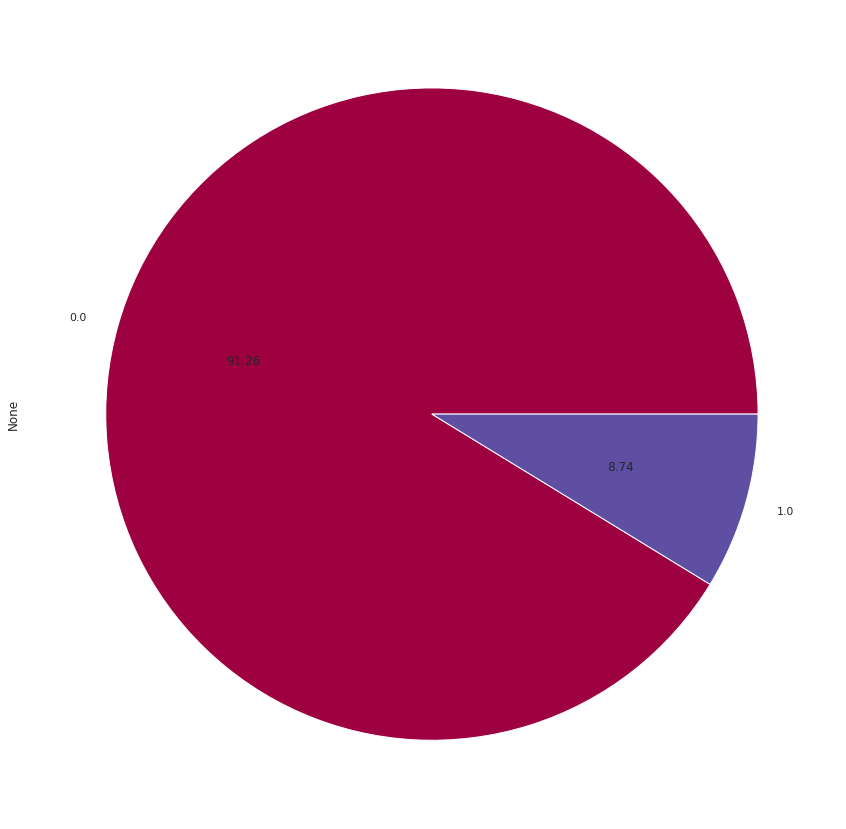

In [19]:
#explore data: look at distribution of fraud and real transactions
cleaned_data.value_counts("fraud").plot.pie(autopct = '%.2f', cmap ='Spectral')
cleaned_data.value_counts("fraud")

We can see here that the data is relatively balanced. 8.74% may seem low but it is also important to be aware that most credit card transactions are not fraudulent. 

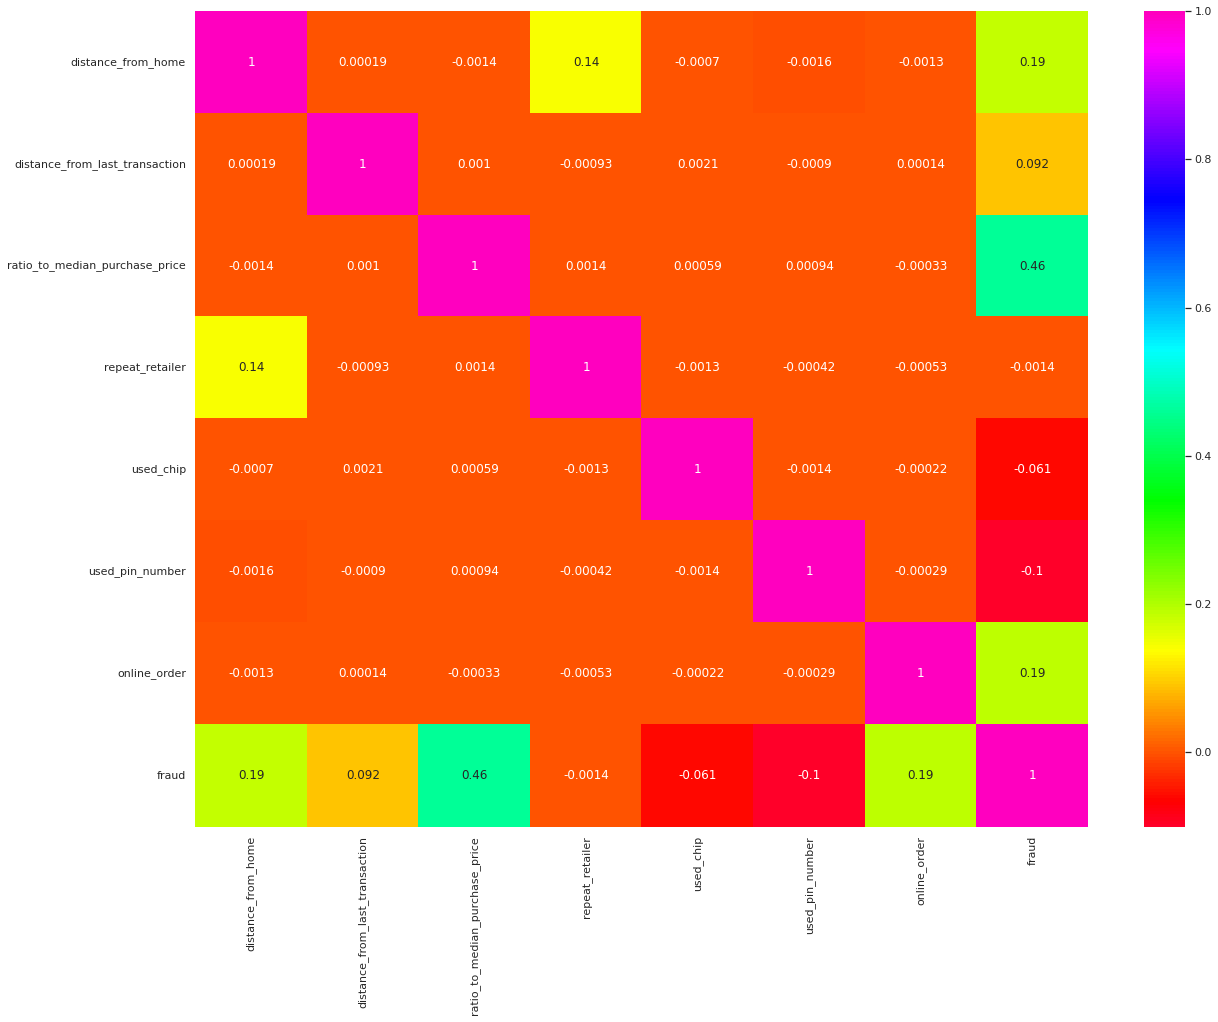

In [20]:
correlation = cleaned_data.corr()

sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True, cmap = "gist_rainbow")
sns.set(rc={"figure.figsize":(20,15)})

The variables that seem to be most correlated with the fraud variable are the distance of the transaction from home, whether or not the transaction involved a pin number, whether or not it was an online order, and most importantly, the ratio to the median transaction price.

**Data Splitting**

In [21]:
X = data.drop(columns ='fraud')
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600000, 7), (400000, 7), (600000,), (400000,))

**Decision Tree**

In [22]:
##training model
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)
percent = accuracy_score(y_test, y_predict) * 100
print("The testing accuracy score is:", percent ,'%')

The testing accuracy score is: 99.99825 %


**K-Nearest-Neighbor**

In [24]:
##determining best k-value
training_accuracy, testing_accuracy = [],[]


In [25]:
for i in range(1,16):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))

This shows the accuracy for k decreases as clustersize increases, so we will choose k=1.

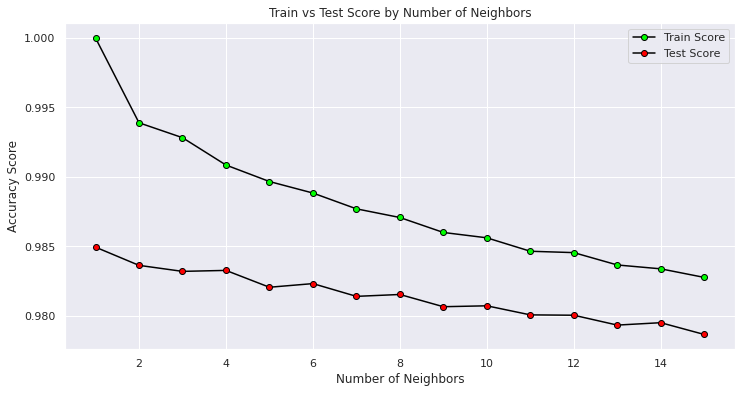

In [29]:
plt.figure(figsize = (12, 6))


plt.plot(range(1, 16), training_accuracy, label = "Train Score",
         marker = "o", markerfacecolor = "#00FF00", color = "#000000")

plt.plot(range(1, 16), testing_accuracy, label = "Test Score", 
         marker = "o", markerfacecolor = "#FF0000", color = "#000000")

plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Train vs Test Score by Number of Neighbors")
plt.legend()
plt.show()

In [27]:
k_model = neighbors.KNeighborsClassifier(n_neighbors = 1)
k_model.fit(X_train, y_train)
y_pred = k_model.predict(X_test)

In [28]:
percent_k = k_model.score(X_test, y_test) * 100
print("The testing accuracy score is:", percent_k ,'%')


The testing accuracy score is: 98.495 %


When comparing the accuracy of the KNN model to the Decision tree, the decision tree was slightly more accurate but they both provided fantastic accuracy.